In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Observable Trends:
#1) Bubble/Scatter Plot: Increasing amounts of riders in urban areas have lower average ride fares compared to those in suburban and rural areas.
#2) Most of the fares and rides are from the Urban areas (approximately 62% and 67% respectively)
#3) Most of the drivers are also in Urban areas while Suburban and Rural make up the other ~%20. This could mean that competition is higher in the Urban areas accounting for cheaper fares.

In [498]:
#join the two separate csvs based on city name
ride_data = pd.read_csv("ride_data.csv")
cities_data = pd.read_csv("city_data.csv")

merged_data = pd.merge(ride_data, cities_data, on="city", how="left")
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [499]:
#Create dataframes for each of the city types: Urban, Suburbran, Rural
#Get the average fare, total # of rides, total # of drivers -- also to be used in pie graphs.

urban_df = merged_data.loc[merged_data['type'] == 'Urban'].sort_values('city')
urban_avg_fare = list(urban_df.groupby('city')['fare'].mean())
urban_total_ride = list(urban_df["city"].value_counts().sort_index())

suburban_df = merged_data.loc[merged_data['type'] == 'Suburban'].sort_values('city')
suburban_avg_fare = list(suburban_df.groupby('city')['fare'].mean())
suburban_total_ride = list(suburban_df["city"].value_counts().sort_index())

rural_df = merged_data.loc[merged_data['type'] == 'Rural'].sort_values('city')
rural_avg_fare = list(rural_df.groupby('city')['fare'].mean())
rural_total_ride = list(rural_df["city"].value_counts().sort_index())

#create a new dataframe for total driver count, drop the duplicates for each city (driver # remains the same)
total_driver_city = list(merged_data['city'])
total_driver_count = list(merged_data['driver_count'])
total_drivers = pd.DataFrame({
    "city": total_driver_city,
    "driver_count": total_driver_count
})

total_driver_pd = total_drivers.drop_duplicates()

#urban driver count
urban_driver_city = list(urban_df['city'])
urban_driver_count = list(urban_df['driver_count'])
urban_total_drivers = pd.DataFrame({
    "city": urban_driver_city,
    "driver_count": urban_driver_count
})

urban_driver_pd = urban_total_drivers.drop_duplicates()

#suburban drive count
suburban_driver_city = list(suburban_df['city'])
suburban_driver_count = list(suburban_df['driver_count'])
suburban_total_drivers = pd.DataFrame({
    "city": suburban_driver_city,
    "driver_count": suburban_driver_count
})

suburban_driver_pd = suburban_total_drivers.drop_duplicates()

#rural drive count
rural_driver_city = list(rural_df['city'])
rural_driver_count = list(rural_df['driver_count'])
rural_total_drivers = pd.DataFrame({
    "city": rural_driver_city,
    "driver_count": rural_driver_count
})

rural_driver_pd = rural_total_drivers.drop_duplicates()

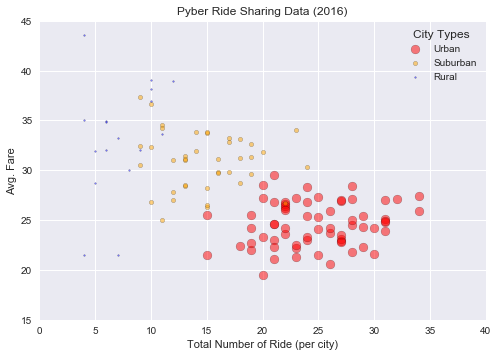

In [526]:
#Plot the scatter/bubble plot for the urban, suburban, rural rides

plt.scatter(
    urban_total_ride,urban_avg_fare,marker="o", facecolors="red", edgecolors="black", alpha=.5, s=urban_driver_count)

plt.scatter(suburban_total_ride,suburban_avg_fare,marker="o", facecolors="orange", edgecolors="black", alpha=.5, s=suburban_driver_count)

plt.scatter(rural_total_ride,rural_avg_fare,marker="o", facecolors="blue", edgecolors="black", alpha=.5, s=rural_driver_count)

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Avg. Fare")
plt.xlabel("Total Number of Ride (per city)")
labels = ["Urban","Suburban","Rural"]
plt.legend(labels, loc="best", title="City Types")

plt.ylim(15,45)
plt.xlim(0,40)
plt.show()

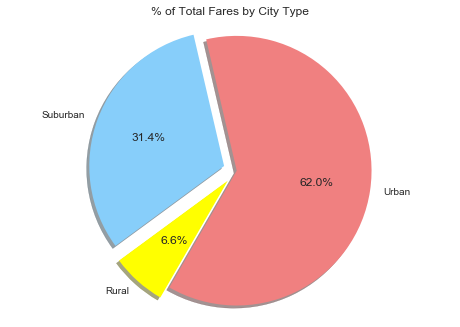

In [523]:
# Percentage of Total Fares by City Type

total_fares = merged_data['fare'].sum()
total_fares

rural_total_fares = (rural_df['fare'].sum())/(total_fares)*100
suburban_total_fares = (suburban_df['fare'].sum())/(total_fares)*100
urban_total_fares = (urban_df['fare'].sum())/(total_fares)*100

labels = ["Urban", "Suburban", "Rural"]
percentage = [urban_total_fares, suburban_total_fares, rural_total_fares]
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = [0,0.1,0.1]

plt.pie(percentage, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=240)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

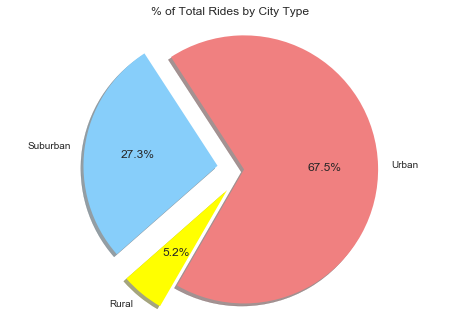

In [522]:
#Total Rides by City Type
total_ride_counts = merged_data["city"].count()
total_ride_counts

rural_ride_counts = rural_df["city"].count()/total_ride_counts*100
suburban_ride_counts = suburban_df["city"].count()/total_ride_counts*100
urban_ride_counts = urban_df["city"].count()/total_ride_counts*100

labels = ["Urban", "Suburban", "Rural"]
percentage = [urban_ride_counts, suburban_ride_counts, rural_ride_counts]
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = [0,0.2,0.2]

plt.pie(percentage, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=240)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()


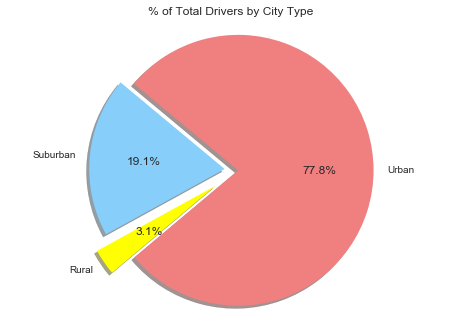

In [521]:
#Total Drivers by City Type
total_driver_count = total_driver_pd['driver_count'].sum()
total_driver_count

urban_driver_count = (urban_driver_pd['driver_count'].sum()/total_driver_count)*100
suburban_driver_count = (suburban_driver_pd['driver_count'].sum()/total_driver_count)*100
rural_driver_count = (rural_driver_pd['driver_count'].sum()/total_driver_count)*100

labels = ["Urban", "Suburban", "Rural"]
percentage = [urban_driver_count, suburban_driver_count, rural_driver_count]
colors = ["lightcoral", "lightskyblue", "yellow"]
explode = [0,0.1,0.2]

plt.pie(percentage, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=True, startangle=220)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()